In [2]:
install.packages(c("sf", "tmap", "rnaturalearth", "rnaturalearthdata"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘logger’, ‘geometries’, ‘rapidjsonr’, ‘sfheaders’, ‘lazyeval’, ‘e1071’, ‘wk’, ‘abind’, ‘png’, ‘stringdist’, ‘spacesXYZ’, ‘geojsonsf’, ‘raster’, ‘jsonify’, ‘crosstalk’, ‘leaflet.providers’, ‘sp’, ‘lwgeom’, ‘dichromat’, ‘XML’, ‘classInt’, ‘s2’, ‘units’, ‘cols4all’, ‘leafem’, ‘leafgl’, ‘leaflegend’, ‘leaflet’, ‘leafsync’, ‘stars’, ‘tmaptools’, ‘servr’, ‘terra’




In [5]:
install.packages("rnaturalearthhires", repos = "https://packages.ropensci.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





── tmap v3 code detected ───────────────────────────────────────────────────────



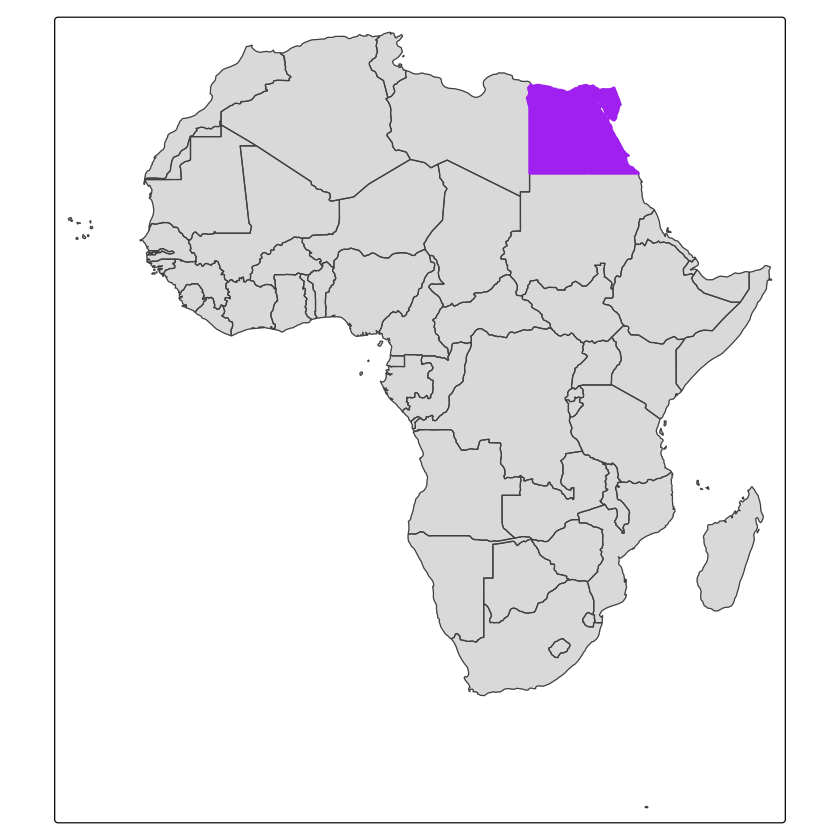

In [15]:
# Load necessary packages
library(sf)              # For handling spatial data
library(tmap)            # For creating thematic maps
library(rnaturalearth)   # Provides world map data
library(rnaturalearthdata)
library(rnaturalearthhires) # For detailed admin-level boundaries

# Load world map data (from Natural Earth dataset)
world <- ne_countries(scale = "medium", returnclass = "sf")

# Subset Africa and Egypt
africa <- world[world$continent == "Africa", ]
egypt <- africa[africa$name == "Egypt", ]

# Create a map of Africa, filling Egypt with a unique color
tm_shape(africa) +
  tm_fill(col = "lightgrey") +                      # Light grey for all Africa
  tm_borders() +                                    # Borders for African countries
  tm_shape(egypt) +
  tm_fill(col = "purple", border.col = "purple", lwd = 2) +  # Fill Egypt with purple
  tm_layout(frame = TRUE,                           # Add a frame around the map
            legend.show = FALSE)                    # Hide the legend



── tmap v3 code detected ───────────────────────────────────────────────────────



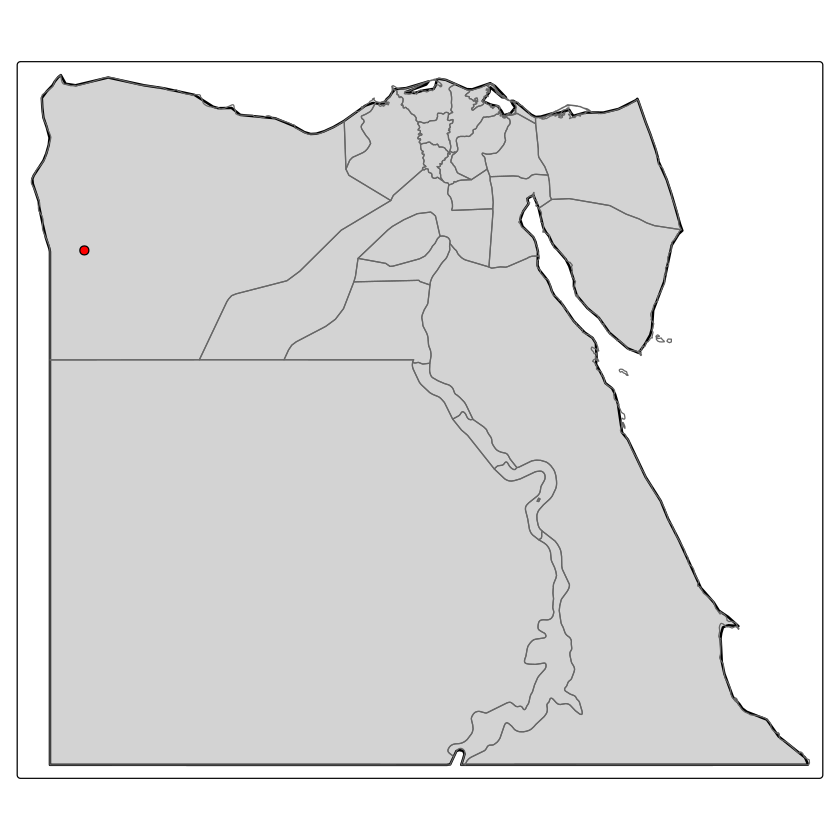

In [16]:
# Load administrative boundaries (level 1 for governorates)
egypt_admin <- ne_states(country = "Egypt", returnclass = "sf")

# Coordinates of Siwa Oasis (approximate location)
siwa_coords <- data.frame(lon = 25.52, lat = 29.20)

# Convert Siwa coordinates to spatial object
siwa_sf <- st_as_sf(siwa_coords, coords = c("lon", "lat"), crs = st_crs(egypt))

# Create a map of Egypt with city boundaries and Siwa Oasis highlighted
tm_shape(egypt) +
  tm_fill(col = "lightgrey", border.col = "black", lwd = 2) +    # Main Egypt map

  # Add city (admin-level) boundaries
  tm_shape(egypt_admin) +
  tm_borders(lwd = 1, col = "grey40") +                            # City boundaries

  # Highlight Siwa Oasis
  tm_shape(siwa_sf) +
  tm_symbols(shape = 21, col = "red", size = 0.5, border.col = "black") +

  # Map layout settings
  tm_layout(frame = TRUE)